In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
df = pd.read_csv('heart.csv')
print(df.head())
x = df.drop(['target','ca','fbs'],axis=1)
y = df['target'].values
df.shape

/Users/kandagadlaashokkumar/python_learn/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


(303, 14)

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
x_train_min = x_train.min()
x_train_max = x_train.max()
x_train_range = (x_train_max - x_train_min)
x_train_scaled = (x_train - x_train_min)/x_train_range
x_train_scaled.head()


(242, 11)

In [3]:
logmodel = LogisticRegression()
logmodel.fit(x_train_scaled,y_train)
svm = LinearSVC()
svm.fit(x_train_scaled,y_train)
y_svm = svm.predict(x_test)
y_log = logmodel.predict(x_test)
df1 = pd.DataFrame({'Actual':y_test,'LogisticRegression':y_log,'SVM':y_svm})
df1=df1.head(20)

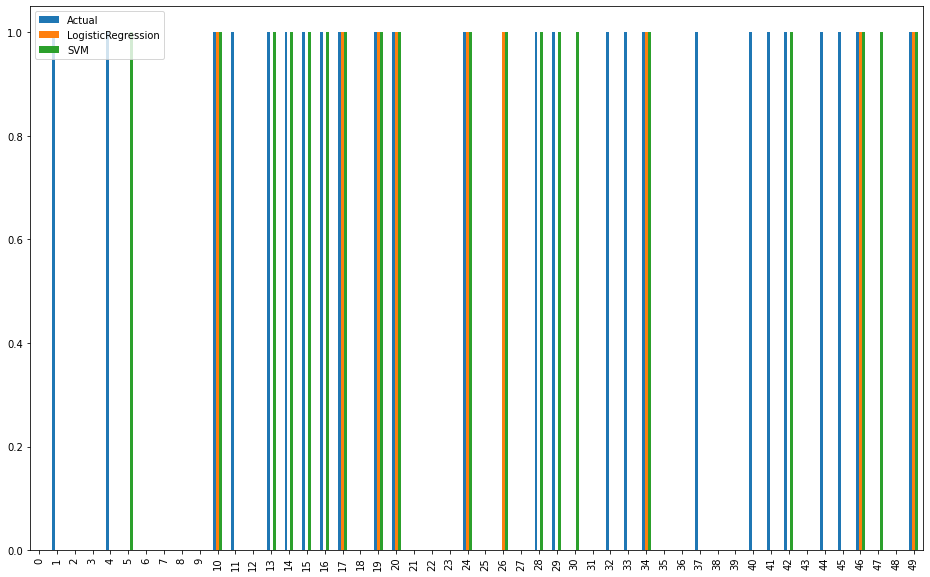

In [189]:
df1.plot(kind='bar',figsize=(16,10))

In [4]:
print('confusion_matrix of LOGISTIC REGRESSION:',confusion_matrix(y_test,y_log))
print('confusion_matrix of SVM:',confusion_matrix(y_test,y_svm))

confusion_matrix of LOGISTIC REGRESSION: [[25  2]
 [24 10]]
confusion_matrix of SVM: [[22  5]
 [15 19]]
